#Step 1: Load Data

In [77]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

##1a) Import the Data + Train Test Split

In [78]:
import tensorflow as tf
from tensorflow import keras

mnist = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

##1b) Visualize the Data

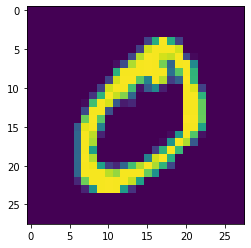

In [79]:
plt.imshow(x_train[1])

In [80]:
x_train[1]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  51, 159, 253, 159,  50,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  48, 238, 252, 252, 252, 237,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [81]:
x_train[1].shape

#we see that the handwritten digit 0 
#in x_train[1] is represented by 28 rows x 28 columns of data
#each represents 0 (black) to 255 (white)  

(28, 28)

In [82]:
y_train[1]

0

In [83]:
display(y_train)

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [84]:
print(len(np.unique(y_train)))
#to see how many classes there are... 10 classes

10


Label: 5


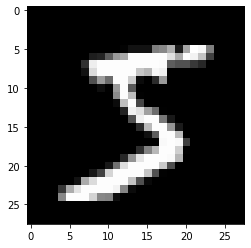

Label: 0


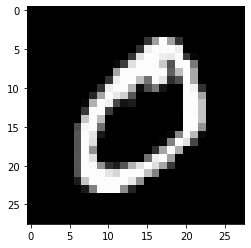

Label: 4


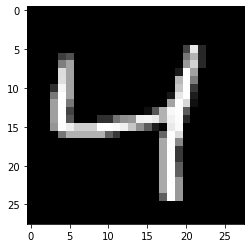

Label: 1


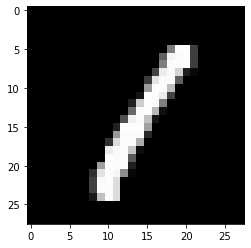

Label: 9


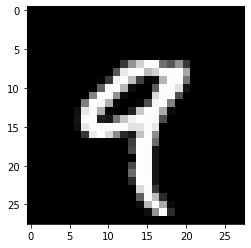

In [85]:
for i in range(5):
  print(f'Label: {y_train[i]}')
  plt.imshow(x_train[i], cmap='gray')
  plt.show()

##1c) Normalize the Data

In [86]:
#normalize the dataset
x_train, x_test = x_train/255, x_test/255
#pictures are from grayscale 0 to 255, so we divide by 255 to 
#normalize from 0 to 1 probability

#0 is pure black
#255 (or 1) is pure white

In [87]:
print(f'Before: {x_train.shape}')

#this means there are 60,000 images inside x_train
#and they are 28x28 pixels

Before: (60000, 28, 28)


#1d) Reshape the Data, or rather, add in additional Parameter --> Channels (RGB)

In [88]:
#Add a channels dimension
x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]
print(f'After: {x_train.shape}')

#this means that we convert the x_train to include another parameter called Channel

After: (60000, 28, 28, 1)


In [89]:
#alternatively, to RESHAPE the data... you can try
#x_train = x_train.reshape((60000, 28, 28, 3))
#x_test = x_test.reshape((10000, 28, 28, 3))



---



#Step 2: Build the Model

In [90]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential([
    Conv2D(filters = 16, 
           kernel_size = (3, 3), 
           activation = 'relu', 
           input_shape = (28,28,1)),
    MaxPooling2D((2,2)),

    Conv2D(32, (3, 3), activation = 'relu'),
    MaxPooling2D((2, 2)),
    
    Flatten(),
    Dense(64, activation = 'relu'),
    Dense(10, activation = 'softmax')

])



##2a) Summary of the Model

In [91]:
model.summary()


Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 13, 13, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_15 (Conv2D)          (None, 11, 11, 32)        4640      
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 5, 5, 32)         0         
 g2D)                                                            
                                                                 
 flatten_7 (Flatten)         (None, 800)               0         
                                                                 
 dense_14 (Dense)            (None, 64)               

##2b) Visualize the Model

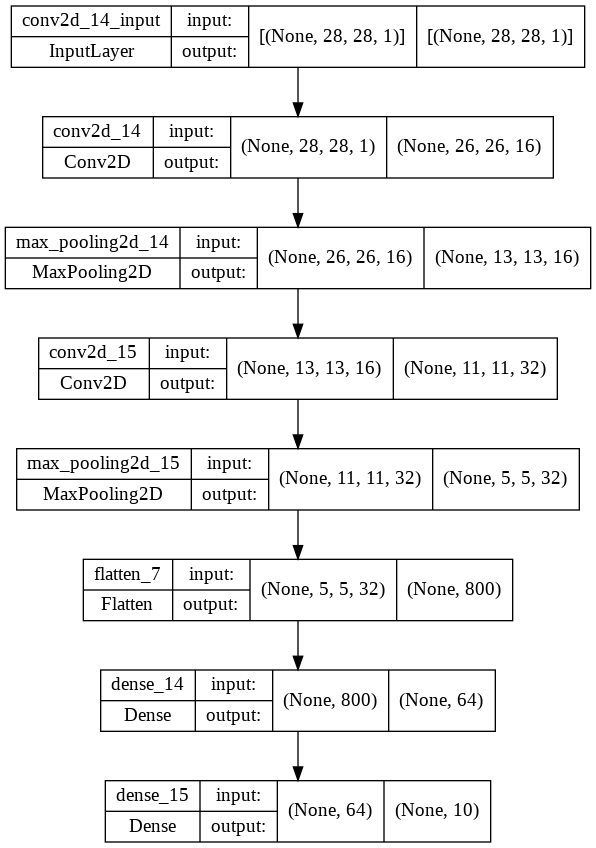

In [92]:
import pydot
keras.utils.plot_model(model, 'model.png', show_shapes=True)



---



#Step 3: Compile the Model

In [93]:
model.compile(
    optimizer='adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

#sparse_categorical_crossentropy is slower to train
#but easier to code
#try converting to categorical_crossentropy for faster

#sparse_categorical_crossentropy dun need "One-Hot Encoding" for 
#both inputs and outputs

#adam is for cross entropy --> Classification
#RMSprop is for Regression



---



#Step 4: Train the Model

In [109]:
history = model.fit(
    x_train, y_train,
    epochs = 10,
    validation_data = (x_test, y_test)
)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0405 - accuracy: 0.9876 - val_loss: 0.0399 - val_accuracy: 0.9876
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0307 - accuracy: 0.9904 - val_loss: 0.0375 - val_accuracy: 0.9877
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0240 - accuracy: 0.9926 - val_loss: 0.0391 - val_accuracy: 0.9873
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0197 - accuracy: 0.9936 - val_loss: 0.0304 - val_accuracy: 0.9910
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0157 - accuracy: 0.9950 - val_loss: 0.0437 - val_accuracy: 0.9874
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0119 - accuracy: 0.9962 - val_loss: 0.0484 - val_accuracy: 0.9876
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0115 - accuracy: 0.9961 - val_loss: 0.0336 - val_accuracy:



---



#Step 5: Running a Handwritten Prediction

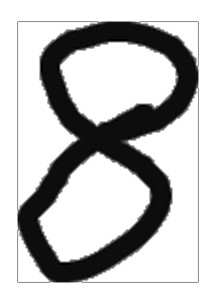

##5a) Importing Image Reshaping Libraries

In [110]:
import numpy as np
import cv2
from skimage import img_as_ubyte    
from skimage.color import rgb2gray
from keras.models import load_model

##5b) Importing and Previewing the Handwritten Image

In [111]:
eight = cv2.imread('/content/8.jpeg')

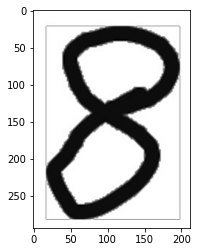

In [112]:
plt.imshow(eight)

##5c) Re-Coloring / Re-Shaping / Re-Sizing

In [113]:
eight_gray = rgb2gray(eight)
eight_gray_u8 = img_as_ubyte(eight_gray)

In [114]:
(thresh, im_binary) = cv2.threshold(eight_gray_u8, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

In [115]:
img_resized = cv2.resize(im_binary,(28,28))

In [116]:
im_gray_invert = 255 - img_resized

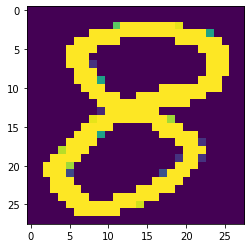

In [117]:
plt.imshow(im_gray_invert)

In [118]:
im_final = im_gray_invert.reshape(1,28,28,1)

#5d) Predicting

In [119]:
ans = model.predict(im_final)

In [120]:
ans = np.argmax(ans,axis=1)[0]
print(ans)

8




---



#Step 6: Visualize the Loss or Error

In [121]:
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epoch = range(len(loss))

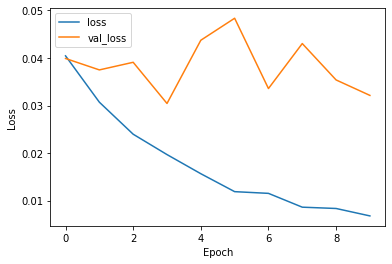

In [122]:
import matplotlib.pyplot as plt

plt.plot(epoch, loss, label = "loss")
plt.plot(epoch, val_loss, label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

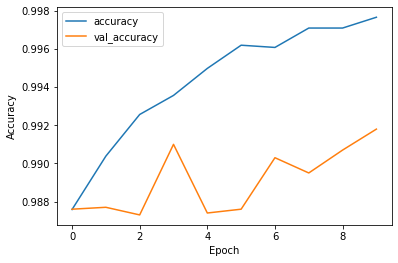

In [123]:
plt.plot(epoch, acc, label = 'accuracy')
plt.plot(epoch, val_acc, label = 'val_accuracy')
plt.xlabel("Epoch")
plt.ylabel('Accuracy')
plt.legend()
plt.show()



---



#Step 7: Evaluate the Model

In [124]:
loss, acc = model.evaluate(x_test, y_test, verbose = 2)
#without verbose, your output gives less detail and more messy

print(f'Accuracy: {acc:5.2%}') 
#string literal (putting another string into it)
#5.2%: 5 characters (including the point) with 2 decimals

313/313 - 1s - loss: 0.0321 - accuracy: 0.9918 - 555ms/epoch - 2ms/step
Accuracy: 99.18%




---



#THE END

---

